<a href="https://colab.research.google.com/github/9143nithinreddy/BigDataAnalytics/blob/main/CNN_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.2992 - loss: 1.1068 - val_accuracy: 0.3100 - val_loss: 1.1130
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3244 - loss: 1.0963 - val_accuracy: 0.3200 - val_loss: 1.1073
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3885 - loss: 1.0875 - val_accuracy: 0.3450 - val_loss: 1.1093
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3788 - loss: 1.0875 - val_accuracy: 0.2800 - val_loss: 1.1127
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3936 - loss: 1.0849 - val_accuracy: 0.2700 - val_loss: 1.1166
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4025 - loss: 1.0815 - val_accuracy: 0.2750 - val_loss: 1.1194
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4229 - loss: 1.0737 - val_accuracy: 0.2500 - val_loss: 1.1280
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3961 - loss: 1.0787 - val_accuracy: 0.2700 - val_loss

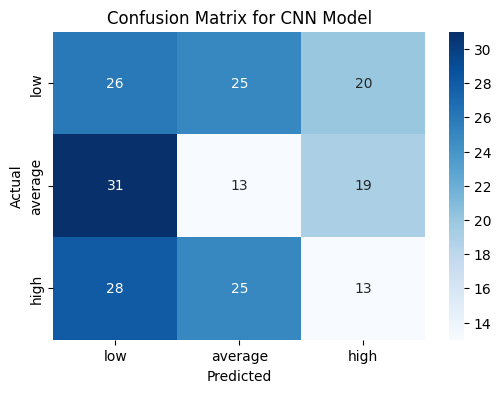

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Step 1: Load & Preprocess the Dataset
np.random.seed(42)
num_students = 1000

data = {
    'math_score': np.random.randint(50, 100, num_students),
    'reading_score': np.random.randint(50, 100, num_students),
    'writing_score': np.random.randint(50, 100, num_students),
    'parental_education': np.random.choice(['high school', 'bachelor', 'master', 'phd'], num_students),
    'lunch': np.random.choice(['standard', 'free/reduced'], num_students),
    'test_prep_course': np.random.choice(['completed', 'none'], num_students),
    'performance_label': np.random.choice(['low', 'average', 'high'], num_students)
}

df = pd.DataFrame(data)

# Encode categorical features
encoder = LabelEncoder()
df['parental_education'] = encoder.fit_transform(df['parental_education'])
df['lunch'] = encoder.fit_transform(df['lunch'])
df['test_prep_course'] = encoder.fit_transform(df['test_prep_course'])
df['performance_label'] = encoder.fit_transform(df['performance_label'])  # Target variable

# Define features and target
X = df.drop(columns=['performance_label'])
y = df['performance_label']

# Convert labels to categorical format
y_cnn = to_categorical(y, num_classes=3)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_cnn, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input for CNN (add third dimension)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Step 2: Build the CNN Model
cnn_model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes (low, average, high)
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the Model
cnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 4: Evaluate the Model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"CNN Model Accuracy: {cnn_accuracy:.4f}")

# Predict class labels
y_pred_cnn = np.argmax(cnn_model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Step 5: Generate Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_cnn)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['low', 'average', 'high'], yticklabels=['low', 'average', 'high'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for CNN Model')
plt.show()
